In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load and Investigate the Data

In [2]:
df = pd.read_csv(r'C:\Data Analytics\Data\Data Portfolio\tennis_ace_starting\tennis_stats.csv')

In [3]:
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [4]:
print(df.columns)

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


Exploratory Analysis

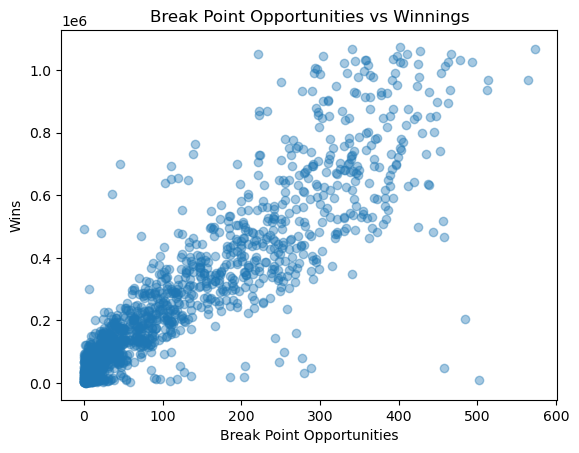

<Figure size 640x480 with 0 Axes>

In [5]:
plt.scatter(df['BreakPointsOpportunities'], df['Winnings'], alpha=0.4)
plt.xlabel('Break Point Opportunities')
plt.ylabel('Winnings')
plt.title('Break Point Opportunities vs Winnings')
plt.show()
plt.clf()

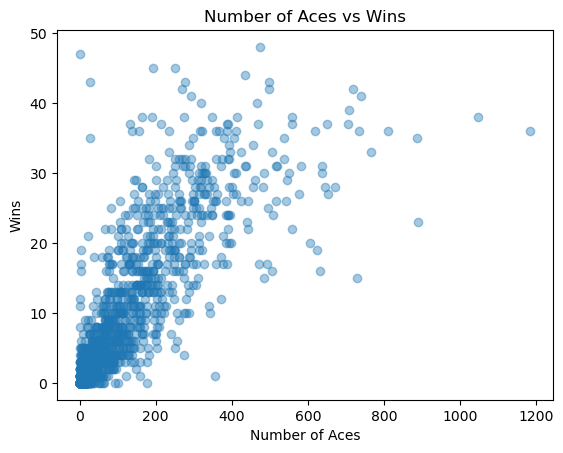

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter(df['Aces'], df['Wins'], alpha=0.4)
plt.xlabel('Number of Aces')
plt.ylabel('Wins')
plt.title('Number of Aces vs Wins')
plt.show()
plt.clf()

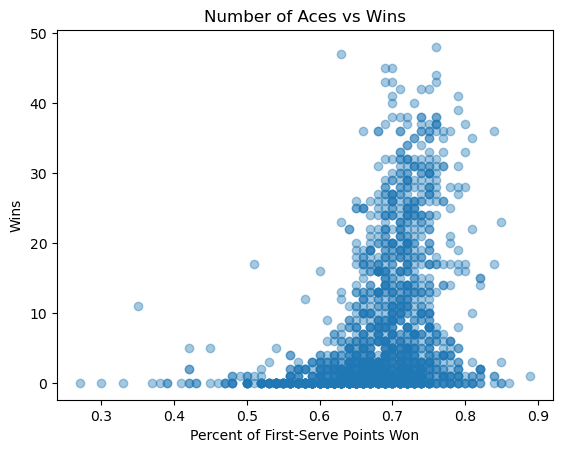

<Figure size 640x480 with 0 Axes>

In [7]:
plt.scatter(df['FirstServePointsWon'], df['Wins'], alpha=0.4)
plt.xlabel('Percent of First-Serve Points Won')
plt.ylabel('Wins')
plt.title('Number of Aces vs Wins')
plt.show()
plt.clf()

Single Linear Regression

In [11]:
features = df[['BreakPointsOpportunities']]
outcome = df[['Wins']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [12]:
model = LinearRegression()
model.fit(features_train, outcome_train)

LinearRegression()

In [13]:
model.score(features_test, outcome_test)

0.8780422980069539

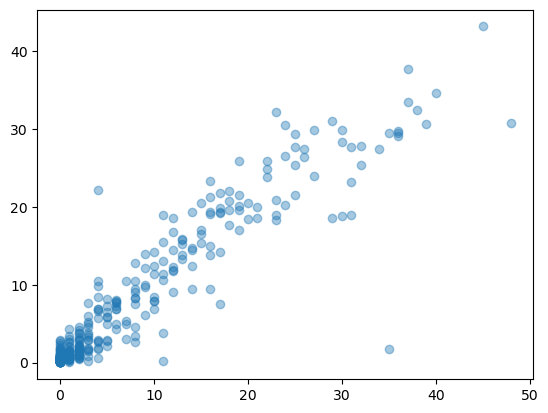

In [15]:
prediction = model.predict(features_test)
plt.scatter(outcome_test, prediction, alpha=0.4)

Two Feature Linear Regression

In [17]:
features = df[['ReturnPointsWon', 'BreakPointsFaced']]
outcome = df[['Losses']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [18]:
mlr = LinearRegression()
model = mlr.fit(features_train, outcome_train)

In [20]:
print(mlr.score(features_test, outcome_test))

0.9011675393315692


Multiple Linear Regression

In [21]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [22]:
mlr = LinearRegression()
model = mlr.fit(features_test, outcome_test)

In [23]:
outcome_predict = mlr.predict(features_test)
print(mlr.coef_)

[[-1.03665391e+05 -2.90699837e+05 -6.34662298e+04 -1.75368668e+05
  -4.11132567e+04 -8.45553037e+01  1.74982384e+04 -1.63471474e+03
   1.15953816e+03  6.19036146e+04  6.91284922e+02  3.46024149e+03
   1.66893944e+04 -2.86141760e+04 -2.30285547e+03 -1.10940242e+05
   2.13526338e+05  6.22329313e+05]]


In [24]:
print(mlr.score(features_test, outcome_test))

0.8648082074036372
